### Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Business and Data Understanding
Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

You may use this list: Click [here](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language "English Speaking Countries") for a list of countries where English is an official language.

 

These conditions will give you sufficient information for your initial analysis. Before getting to specific questions, let’s understand the problem and the data first.

 

1. What is the strategy?

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

 

2. Where did we get the data from? 

We have taken real investment data from crunchbase.com, so the insights you get may be incredibly useful. For this assignment, we have divided the data into the following files:

 

You have to use three main data tables for the entire analysis (available for download on the next page):

 

3. What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
Goals of data analysis: Your goals are divided into three sub-goals:
Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

#### Submission by Venki Ramachandran

In [221]:
import numpy as np
import pandas as pd
companies = pd.read_csv('companies.csv', encoding ='iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv', encoding ='iso-8859-1')
mapping = pd.read_csv('mapping.csv', encoding ='iso-8859-1')

In [222]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [223]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [224]:
# rename the company_permalink col name to permalink
rounds2 = rounds2.rename(columns={"company_permalink": "permalink"})

In [225]:
# Convert all permalink entries to lowercase in both tables
rounds2["permalink"] = rounds2["permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [226]:
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [227]:
rounds2_uniq = rounds2.permalink.unique()
print(len(rounds2_uniq))

66370


In [228]:
companies_uniq = companies.permalink.unique()
print(len(companies_uniq))
# Ans = 66368
companies_uniq = companies.name.unique()
print(len(companies_uniq))
# Ans = 66100
companies_uniq = companies.homepage_url.unique()
print(len(companies_uniq))
# Ans = 61192

66368
66100
61192


In [229]:
# Find the companies in rounds2 file not in companies file
rounds2[(~rounds2.permalink.isin(companies.permalink))]

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


#### Oh!! there are permalink entries in 'rounds2' file with bogus extra chars<br>
Yes, there are more entries in the rounds2 file than companies file.<br>
But that is due to bogus chars

#### Cleaning the raw data in very important
As we might lose some good data, if it is not cleaned. But for this assignment, I will remove the bogus record and resave it in the rounds data frame.<br>

In [230]:
rounds2.shape

(114949, 6)

In [231]:
# Remove all entries not in companies tables and restore
rounds2 = rounds2[(rounds2.permalink.isin(companies.permalink))]
rounds2.shape

(114942, 6)

#### seven rows got removed from the rounds2 file
Do the same for the companies file

In [232]:
companies.shape

(66368, 10)

In [233]:
# Find the entries in companies file not in round2 file
companies[(~companies.permalink.isin(rounds2.permalink))]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [234]:
companies = companies[(companies.permalink.isin(rounds2.permalink))]
companies.shape

(66363, 10)

In [235]:
# Convert all permalink entries to lowercase in both tables
rounds2["permalink"] = rounds2["permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [236]:
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [237]:
#  Find unique rows again for rounds2
rounds2_uniq = rounds2.permalink.unique()
print(len(rounds2_uniq))

66363


In [238]:
#  Find unique rows again for companies
companies_uniq = companies.permalink.unique()
print(len(companies_uniq))

66363


Since we deleted all the entries on the 'permalink' column from each of the two file, namely: round2 and companies, the unique number of rows in both files as the same which is equal to 66363. Now check if there are any companies in the rounds2 file which are not  present in companies ?

In [239]:
rounds2[~(rounds2.permalink.isin(companies.permalink))]

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


So there are NO companies in rounds file that are not present in companies file 
#### After we cleaned and deleted the bogus record.

In [240]:
# merge to form the master_frame df
master_frame = pd.merge(rounds2,
                 companies,
                 on='permalink')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [241]:
master_frame.shape

(114942, 15)

In [242]:
# analyse 'raised_amont_usd' for outliers
master_frame.describe()

,raised_amount_usd
count,9.495800e+04
mean,1.042696e+07
std,1.148218e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680521e+06
75%,7.000000e+06
max,2.127194e+10


##### Hmmm....there are investments where the amt = 0 and max = 21.2 billion, seems like we have outliers. Let us remove
* Zero investments
* Null investment amounts
* Set high at 5 Billion (i.e 5000 million) and remove amts greater than that. 

In [243]:
higher=5000000000
#Higher than 1 billion investment in USD
temp = master_frame[(master_frame["raised_amount_usd"]>=higher)]
temp.shape

(5, 15)

In [244]:
# How many with zero investment amt
temp = master_frame[(master_frame["raised_amount_usd"]==0.0)]
temp.shape

(415, 15)

In [245]:
# How many with null
temp = master_frame[(master_frame["raised_amount_usd"].isnull())]
temp.shape

(19984, 15)

In [246]:
mf=master_frame[~(master_frame["raised_amount_usd"]>=higher)]
mf.shape

(114937, 15)

In [247]:
# Good 5 rows above 5 billion removed
mf=mf[~(mf["raised_amount_usd"].isnull())]
mf=mf[~(mf["raised_amount_usd"]==0.0)]
mf.shape

(94538, 15)

#### So we have removed all the outliers, nulls and zero(0) investment amounts. The total number of rows now in the df are 94,538. Let us use that going forward.

In [248]:
master_frame=mf
master_frame.shape

(94538, 15)

### Table 2.1 Answers

In [249]:
# let us look at the value_counts of funding_round_type
master_frame["funding_round_type"].value_counts()

venture                  50198
seed                     23507
debt_financing            6655
angel                     4829
grant                     2122
private_equity            1933
undisclosed               1565
convertible_note          1423
equity_crowdfunding       1046
post_ipo_equity            627
product_crowdfunding       382
post_ipo_debt              151
non_equity_assistance       70
secondary_market            30
Name: funding_round_type, dtype: int64

#### After removing the outliers, the representative value can be 'mean' and if outliers are not removed, we should use the median as the most representative value. Since I removed the outliers, I will use the representative value is the 'mean' going forward.

In [250]:
#Representative funding amount of venture type = mean
# i.e=mean of the raised_amount_usd where funding_round_type=venture
master_frame[master_frame["funding_round_type"] == "venture"]["raised_amount_usd"].mean()


11405359.115422925

In [251]:
#Representative funding amount of angel type 
# i.e=mean of the raised_amount_usd where funding_round_type=angel
master_frame[master_frame["funding_round_type"] == "angel"]["raised_amount_usd"].mean()


964848.8554566163

In [252]:
#Representative funding amount of angel type 
# i.e=mean of the raised_amount_usd where funding_round_type=angel
master_frame[master_frame["funding_round_type"] == "seed"]["raised_amount_usd"].mean()


722688.5011273237

In [253]:
#Representative funding amount of angel type 
# i.e=mean of the raised_amount_usd where funding_round_type=seed
master_frame[master_frame["funding_round_type"] == "private_equity"]["raised_amount_usd"].mean()


73422367.35902742

The above four (4) values have been added to the table 2.1 columns

#### Since they want to invest from 5 M to 15 Million and the mean values of venture is 11.41 M, I would advise them to look at some investments in the  VENTURE type.

In [254]:
# Filter the master_frame for only these tyes of investments
master_frame = master_frame[(master_frame.funding_round_type == "venture")]

In [255]:
master_frame.shape

(50198, 15)

We have 50,198 rows of investments in the funding type 'venture'.

#### Table 3.1 Answers

In [256]:
#Top English speaking country, county_code in companies table must
#be mapped to a list of english speakign countries
#Let us get that data from a public site
#https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

#Step-1: Download as PDF
#Step-2:Cut and paste the top two tables in ato a txt file
#Step-3:Use vi to remove all the spaces and comma seperate it
#Save as csv and load here 
#eng = pd.read_csv('english_speaking_countries.csv')
# rename its column name to match with what is in companie file
#eng = eng.rename(columns={"Alpha-3 code": "country_code"})
# Storeonly where the Primary language = "Yes"
#eng = eng[eng["Primary language?"] == "Yes"]
#eng.head(10)

In [257]:
# Group master_frame by coountry code and sum
temp = master_frame.groupby(["country_code"]).sum()
top9 = temp.sort_values(by="raised_amount_usd", ascending=False).iloc[:9,:]
top9

,raised_amount_usd
country_code,
USA,4.049108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


#### Checking againist the wiki page and eliminating CHN and IND because they do not have English as the Primary Language, we get the top three countries as USA, GBR and CAN

### Table 5.1 Answers - Sector Wise investment

In [259]:
#Rename the column name category_list to "primary_sector"
mapping = mapping.rename(columns={"category_list": "primary_sector"})
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [261]:
# Save it into a different df so that you do not mess the original
mf=master_frame
mf.head(5)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [262]:
# First split the category values with a "|" and store first values
# in a seperate column called 'primary_sector'
mf["primary_sector"]=mf["category_list"].str.split('|').str[0]

In [263]:
#Note that we are interested in the eight 'main sectors' provided in 
#the mapping file. so ignore 'Blanks'
#Q1 - Total number of investments (Count)
mf = mf.merge(mapping, how='inner')
mf.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,...,Media,0,0,0,1,0,0,0,0,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,Media,0,0,0,1,0,0,0,0,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,Media,0,0,0,1,0,0,0,0,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,Media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,...,Media,0,0,0,1,0,0,0,0,0


In [264]:
mf.shape

(46997, 25)

In [265]:
conditions = [mf['Automotive & Sports'] == 1,
        mf['Cleantech / Semiconductors'] == 1,
        mf['Entertainment'] == 1,
        mf['Health'] == 1,
        mf['Manufacturing'] == 1,
        mf['News, Search and Messaging'] == 1,
        mf['Others'] == 1,
        mf['Social, Finance, Analytics, Advertising'] == 1]
        

main_sectors = ['Automotive & Sports','Cleantech / Semiconductors',
         'Entertainment','Health','Manufacturing',
         'News, Search and Messaging','Others',
         'Social, Finance, Analytics, Advertising']

mf['main_sector'] = np.select(conditions,main_sectors)
mf

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46992,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,D,22-07-2013,4220000.0,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,...,0,0,0,0,0,0,0,1,0,Others
46993,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,...,0,0,0,0,0,0,0,1,0,Others
46994,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,...,0,0,0,0,0,0,0,1,0,Others
46995,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,NaN,01-07-2007,7227332.0,Yunnan Landsun Green Industry (Group),http://www.lstea.tech-food.com/,Tea,operating,...,0,0,0,0,0,0,0,1,0,Others


In [266]:
# FT = 'venture' & Investment amount >=5M and <=20M, Country = USA
# D1 = USA
D1 = mf[(mf["funding_round_type"] == 'venture') & (mf["raised_amount_usd"] >= 5000000)
& (mf["raised_amount_usd"] <= 20000000) & (mf["country_code"] == "USA")]
D1

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
24,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,...,0,0,0,1,0,0,0,0,0,Entertainment
25,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,...,0,0,0,1,0,0,0,0,0,Entertainment
33,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,...,0,0,0,1,0,0,0,0,0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46975,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,B,01-01-2008,5000000.0,ThisNext,http://www.thisnext.com,Social Buying|Social Media,operating,...,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
46978,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,A,18-09-2013,5000000.0,Thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,...,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
46984,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8250000.0,User Interface,http://www.userinterface.com,User Interface,operating,...,0,0,0,0,0,0,0,1,0,Others
46986,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10500000.0,Washio,http://www.getwashio.com,Service Industries,operating,...,0,0,0,0,0,0,0,1,0,Others


So in USA, for FT='venture' and investment amt between 5M and 20M<br>
there have been *13184* total number of investments as seen above

In [267]:
# FT = 'venture' & Investment amount >=5M and <=20M, Country = GBR
# D2V = GBR
D2 = mf[(mf["funding_round_type"] == 'venture') & (mf["raised_amount_usd"] >= 5000000)
& (mf["raised_amount_usd"] <= 20000000) & (mf["country_code"] == "GBR")]
D2.shape

(684, 26)

In [268]:
# FT = 'venture' & Investment amount >=5M and <=20M, Country = CAN
# D3 = CAN
D3 = mf[(mf["funding_round_type"] == 'venture') & (mf["raised_amount_usd"] >= 5000000)
& (mf["raised_amount_usd"] <= 20000000) & (mf["country_code"] == "CAN")]
D3.shape

(454, 26)

#### Total Investment amounts

In [269]:
print(D1["raised_amount_usd"].sum())
print(D2["raised_amount_usd"].sum())
print(D3["raised_amount_usd"].sum())

135721862959.0
6822644700.0
4425303389.0


#### Top Sector Name for each country

In [292]:
# USA, FT = venture
temp = D1["main_sector"].value_counts()
temp.sort_values(ascending=False)

Others                                     3335
Cleantech / Semiconductors                 2845
Social, Finance, Analytics, Advertising    2199
News, Search and Messaging                 1767
Health                                     1104
Manufacturing                               969
Entertainment                               674
Automotive & Sports                         187
0                                           104
Name: main_sector, dtype: int64

In [271]:
# GBR, FT = venture
temp = D2["main_sector"].value_counts()
temp.sort_values(ascending=False)

Others                                     167
Cleantech / Semiconductors                 150
Social, Finance, Analytics, Advertising    112
News, Search and Messaging                  87
Entertainment                               64
Manufacturing                               49
Health                                      29
Automotive & Sports                         18
0                                            8
Name: main_sector, dtype: int64

In [272]:
# CAN, FT = venture
temp = D3["main_sector"].value_counts()
temp.sort_values(ascending=False)

Cleantech / Semiconductors                 131
Others                                     124
Social, Finance, Analytics, Advertising     58
News, Search and Messaging                  54
Manufacturing                               36
Entertainment                               22
Health                                      21
0                                            6
Automotive & Sports                          2
Name: main_sector, dtype: int64

#### For point 3 (top sector count-wise), which company received the highest investment?

In [273]:
t1 = D1[D1.main_sector == 'Others'][["name","raised_amount_usd"]]
t2 = t1.groupby(["name"]).count()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
Black Duck Software,7
Capella Photonics,7
ExaGrid Systems,6
Panaya,6
Virtustream,6
...,...
ImmunoCellular Therapeutics,1
Imagine Health,1
ImageWare Systems,1


#### If you just count the number of investments per company as seen above you get the top two companies as 'Black Duck Software' and 'Capella Photonics'. Each got seven (7) rounds of investment. But if you sum it up ...as seen below...

In [274]:
t2 = t1.groupby(["name"]).sum()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
ExaGrid Systems,77717024.0
Capella Photonics,74968051.0
Avere Systems,72000000.0
Black Duck Software,71000000.0
Panaya,69000000.0
...,...
Invision.com,5000000.0
Rokk3r Labs,5000000.0
BitArmor Systems,5000000.0


#### The top two companies are 'ExaGrid Systems' and  'Capella Photonics'. I am listing the companies by the number of times they have received investments.
Because every time you need to get a new round of investment, you have to convince the VC firms and they would interogate the validity of the business, revenues, etc. and only when convinced will invest. So greater the number of  investments, indicates a greater level of validity of the business and hence a better opportunity to invest.

In [275]:
t1 = D2[D2.main_sector == 'Others'][["name","raised_amount_usd"]]
t2 = t1.groupby(["name"]).count()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
picoChip,4
SenSage,4
Electric Cloud,4
Aepona,3
OpenCloud,3
...,...
Medikidz,1
MedaPhor,1
Marcandi,1


In [276]:
t1 = D3[D3.main_sector == 'Cleantech / Semiconductors'][["name","raised_amount_usd"]]
t2 = t1.groupby(["name"]).count()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
Fresco Microchip,4
Ostara,4
OneChip Photonics,4
Nexterra,3
Diablo Technologies,3
...,...
Medicago,1
Aegera Therapeutics,1
Millenium Biologix,1


#### For point 4 (second best sector count-wise), which company received the highest investment?

In [277]:
t1 = D1[D1.main_sector == 'Cleantech / Semiconductors'][["name","raised_amount_usd"]]
t2 = t1.groupby(["name"]).count()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
Biodesix,9
Tigo Energy,9
ForSight Labs,7
GainSpan,7
SCIenergy,7
...,...
Hadron Systems,1
HUYA Bioscience International,1
HS Pharmaceuticals,1


In [278]:
t1 = D2[D2.main_sector == 'Cleantech / Semiconductors'][["name","raised_amount_usd"]]
t2 = t1.groupby(["name"]).count()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
Horizon Discovery,4
EUSA Pharma,4
MicroEmissive Displays Group,3
F-star Biotechnology Limited,3
Xention,2
...,...
Fastnet Oil and Gas,1
F2G,1
Exco InTouch,1


In [279]:
t1 = D3[D3.main_sector == 'Others'][["name","raised_amount_usd"]]
t2 = t1.groupby(["name"]).count()
t2.sort_values(by="raised_amount_usd",ascending=False)

,raised_amount_usd
name,
Teradici,4
NewStep Networks,3
Coveo,3
QuickPlay Media,3
Empathica,2
...,...
Fixmo,1
Extreme Startups,1
Espial Group,1


#### Draw the three plots to add to the presentation to teh CEO of Sparks Fund.

In [280]:
# Histogram of representative values for the four funds.
import seaborn as sns
df = rounds2.groupby(["funding_round_type"]).mean()
df["raised_amount_usd"] = df["raised_amount_usd"] / 1000000
df = df.reset_index()
df = df[(df['funding_round_type'] == 'angel') | (df['funding_round_type'] == 'venture') | 
    (df['funding_round_type'] == 'private_equity') | (df['funding_round_type'] == 'seed')]
df

,funding_round_type,raised_amount_usd
0,angel,0.958694
8,private_equity,73.308593
11,seed,0.719780
13,venture,11.748949


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

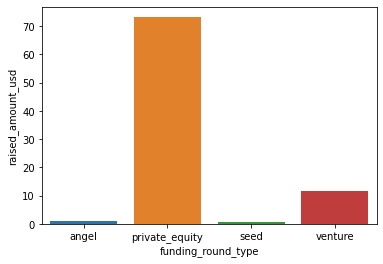

In [281]:
#Plot a histogram
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=df)

#### Top 9 countries against the total amount of investments of funding type 'venture'.

In [282]:
temp = mf.groupby(["country_code"]).sum()
temp["raised_amount_usd"] = temp["raised_amount_usd"] / 1000000
top9 = temp.sort_values(by="raised_amount_usd", ascending=False).iloc[:9,:]
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,USA,377080.394849,505,192,7846,1754,3259,2453,4301,8239,5153
1,CHN,37527.936127,30,16,109,189,99,116,250,469,220
2,GBR,19097.204731,44,14,433,133,118,122,241,507,317
3,IND,13668.331235,31,5,54,75,42,55,130,280,77
4,CAN,8816.735173,14,10,329,50,61,100,132,326,164
5,FRA,7066.525060,17,5,156,59,47,74,104,296,133
6,ISR,6573.864579,9,10,168,47,90,89,100,146,100
7,DEU,5791.691412,6,4,149,32,39,43,64,118,65
8,SWE,3138.704077,2,9,52,27,10,29,45,65,32


<AxesSubplot:xlabel='country_code', ylabel='raised_amount_usd'>

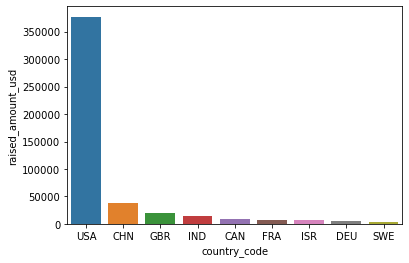

In [283]:
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)

#### Number of investments in the top 3 sectors of the top 3 countries on one chart for the venture investment type. This plot should clearly display the top 3 sectors each in USA, GBR, and CAN.

In [284]:
# Create the top 3 for each country and then Stack on top of each other
# USA
D1_grouped = D1.groupby(["country_code","main_sector"]).count()
D1_grouped_sorted = D1_grouped.sort_values(by="raised_amount_usd", ascending=False).iloc[:3,:]
D1_grouped_sorted = pd.DataFrame(D1_grouped_sorted["raised_amount_usd"])
# GBR
D2_grouped = D2.groupby(["country_code","main_sector"]).count()
D2_grouped_sorted = D2_grouped.sort_values(by="raised_amount_usd", ascending=False).iloc[:3,:]
D2_grouped_sorted = pd.DataFrame(D2_grouped_sorted["raised_amount_usd"])
# CAN
D3_grouped = D3.groupby(["country_code","main_sector"]).count()
D3_grouped_sorted = D3_grouped.sort_values(by="raised_amount_usd", ascending=False).iloc[:3,:]
D3_grouped_sorted = pd.DataFrame(D3_grouped_sorted["raised_amount_usd"])


In [285]:
df1 = D1_grouped_sorted.reset_index()
df1

,country_code,main_sector,raised_amount_usd
0,USA,Others,3335
1,USA,Cleantech / Semiconductors,2845
2,USA,"Social, Finance, Analytics, Advertising",2199


In [286]:
df2 = D2_grouped_sorted.reset_index()
df2

,country_code,main_sector,raised_amount_usd
0,GBR,Others,167
1,GBR,Cleantech / Semiconductors,150
2,GBR,"Social, Finance, Analytics, Advertising",112


In [287]:
df3 = D3_grouped_sorted.reset_index()
df3

,country_code,main_sector,raised_amount_usd
0,CAN,Cleantech / Semiconductors,131
1,CAN,Others,124
2,CAN,"Social, Finance, Analytics, Advertising",58


In [288]:
# Stack on top of each other
all_dfs = [df1,df2,df3]
result = pd.concat(all_dfs)
result

,country_code,main_sector,raised_amount_usd
0,USA,Others,3335
1,USA,Cleantech / Semiconductors,2845
2,USA,"Social, Finance, Analytics, Advertising",2199
0,GBR,Others,167
1,GBR,Cleantech / Semiconductors,150
2,GBR,"Social, Finance, Analytics, Advertising",112
0,CAN,Cleantech / Semiconductors,131
1,CAN,Others,124
2,CAN,"Social, Finance, Analytics, Advertising",58


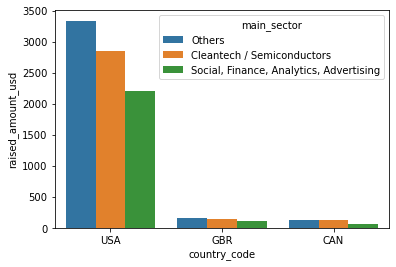

In [289]:
# Plot this
import seaborn as sns
ax = sns.barplot(x='country_code',y='raised_amount_usd',
                 hue='main_sector', data=result)

#### Phew - That is it!!
Thanks while this was a tough assignment, I learnet a lot. I am database engineer for my entire career and have used PostGresDB in my startups multiple times and all along the way I felt it is so much easier to do this analysis and pivit tables in a PostGres or any RDBMS. But nevertheless it was a good learning to code all along in python.

Thanks, Venki